<a href="https://colab.research.google.com/github/Nageswar-Sahoo/Computer-Vision-Project/blob/main/S10/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/Nageswar-Sahoo/Computer-Vision-Project.git

Cloning into 'Computer-Vision-Project'...
remote: Enumerating objects: 8693, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8322/8322), done.
remote: Total 8693 (delta 919), reused 7853 (delta 269), pack-reused 0
Receiving objects: 100% (8693/8693), 286.74 MiB | 28.65 MiB/s, done.
Resolving deltas: 100% (919/919), done.
Checking out files: 100% (14836/14836), done.


In [1]:
!pip install -U git+https://github.com/albumentations-team/albumentations
import albumentations 
from albumentations.pytorch import ToTensorV2

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-kj2idnv2
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-kj2idnv2
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=105152 sha256=911e9d9abb8bfda516ab0556ad8afe74ef11a0db44b405a6d0a41a2cc709ba2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-goffc7km/wheels/3a/25/ed/ec3b518e7a332d7f0a3bb37c280e1b784cf2f79b94b3c7d00b
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

In [11]:
cd Computer-Vision-Project

/content/Computer-Vision-Project


In [12]:
cat config.json

{
    "name": "TinyImageNet",
    "trainer": {
        "epochs": 50,
        "save_dir": "saved/",
        "save_period": 1,
        "verbosity": 2,
        "monitor": "min val_loss",
        "early_stop": 50,
        "tensorboard": true
    }
}


In [7]:
ls

base/         IMagenet/  normalization/    saved/
config.json   LICENSE    parse_config.py   trainer/
data_loader/  logger/    __pycache__/      traininglogsincoolab.ipynb
dog.jpg       main.py    README.md         transformation/
gb.jpg        model/     requirements.txt  utils/


In [23]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/Nageswar-Sahoo/Computer-Vision-Project
   586db9d..c7d1fac  main       -> origin/main
Updating 586db9d..c7d1fac
Fast-forward
 template/transformation/trsfm.py | 5 +++++
 1 file changed, 5 insertions(+)


In [24]:
from parse_config import ConfigParser
from trainer import Trainer
from utils import prepare_device
from utils import get_splited_data
import model.loss as module_loss
import model.metric as module_metric
import torch.optim as optim
import logging
import numpy as np
import torch
import model.customresnet as module_resnet
import utils
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)
import torch
import data_loader.data_loaders as data_loaders
import torchvision.models as models
import torch.nn as nn

In [25]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()
    train_data_u, train_labels_u, test_data, test_labels = get_splited_data()
    train_labels_u=train_labels_u.astype(float)
    test_labels=test_labels.astype(float)




    data_loader = data_loaders.get_train_data_loader(train_data_u, train_labels_u, 64)

    valid_data_loader = data_loaders.get_test_data_loader(test_data, test_labels, 64)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()
    #Load Resnet18
    model = models.resnet18(True)
    #Finetune Final few layers to adjust for tiny imagenet input
    model.avgpool = nn.AdaptiveAvgPool2d(1)
    model.fc.out_features = 200



    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.01)
    # optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=lr_scheduler)


starting loading data
finished loading data, in 25.391515016555786 seconds
test data shape:  (30000, 64, 64, 3)
test_labels.shape:  (30000, 200)
train data shape:  (80000, 64, 64, 3)
train label shape:  (80000, 200)
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
     

In [22]:
trainer.train()

Train Epoch: 1  [0/1250 (0%)] Loss: 14.627482
Train Epoch: 1  [8/1250 (1%)] Loss: 7.715474
Train Epoch: 1  [16/1250 (1%)] Loss: 8.523719
Train Epoch: 1  [24/1250 (2%)] Loss: 10.926496
Train Epoch: 1  [32/1250 (3%)] Loss: 8.005713
Train Epoch: 1  [40/1250 (3%)] Loss: 7.328265
Train Epoch: 1  [48/1250 (4%)] Loss: 6.002955
Train Epoch: 1  [56/1250 (4%)] Loss: 5.952745
Train Epoch: 1  [64/1250 (5%)] Loss: 6.498521
Train Epoch: 1  [72/1250 (6%)] Loss: 5.780187
Train Epoch: 1  [80/1250 (6%)] Loss: 5.937181
Train Epoch: 1  [88/1250 (7%)] Loss: 5.607745
Train Epoch: 1  [96/1250 (8%)] Loss: 5.469839
Train Epoch: 1  [104/1250 (8%)] Loss: 5.462838
Train Epoch: 1  [112/1250 (9%)] Loss: 5.614054
Train Epoch: 1  [120/1250 (10%)] Loss: 5.592418
Train Epoch: 1  [128/1250 (10%)] Loss: 5.515809
Train Epoch: 1  [136/1250 (11%)] Loss: 5.502157
Train Epoch: 1  [144/1250 (12%)] Loss: 5.543828
Train Epoch: 1  [152/1250 (12%)] Loss: 5.482125
Train Epoch: 1  [160/1250 (13%)] Loss: 5.477230
Train Epoch: 1  [168

KeyboardInterrupt: ignored

In [26]:
trainer.train()

Streaming output truncated to the last 5000 lines.
Train Epoch: 20  [672/1250 (54%)] Loss: 0.015321
Train Epoch: 20  [680/1250 (54%)] Loss: 0.022853
Train Epoch: 20  [688/1250 (55%)] Loss: 0.033719
Train Epoch: 20  [696/1250 (56%)] Loss: 0.045242
Train Epoch: 20  [704/1250 (56%)] Loss: 0.060712
Train Epoch: 20  [712/1250 (57%)] Loss: 0.056761
Train Epoch: 20  [720/1250 (58%)] Loss: 0.023949
Train Epoch: 20  [728/1250 (58%)] Loss: 0.055210
Train Epoch: 20  [736/1250 (59%)] Loss: 0.008264
Train Epoch: 20  [744/1250 (60%)] Loss: 0.042698
Train Epoch: 20  [752/1250 (60%)] Loss: 0.011859
Train Epoch: 20  [760/1250 (61%)] Loss: 0.027879
Train Epoch: 20  [768/1250 (61%)] Loss: 0.047321
Train Epoch: 20  [776/1250 (62%)] Loss: 0.111117
Train Epoch: 20  [784/1250 (63%)] Loss: 0.054411
Train Epoch: 20  [792/1250 (63%)] Loss: 0.010328
Train Epoch: 20  [800/1250 (64%)] Loss: 0.032139
Train Epoch: 20  [808/1250 (65%)] Loss: 0.044727
Train Epoch: 20  [816/1250 (65%)] Loss: 0.021666
Train Epoch: 20  [

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

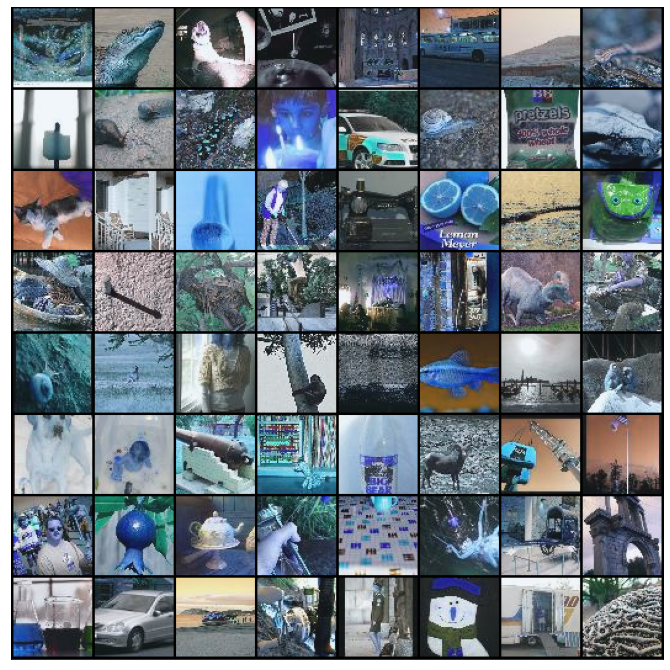

In [ ]:
show_batch(valid_data_loader)
